# CREDIT CARD FRAUD DETECTION

## What is Credit Card Fraud?
Credit card fraud is when someone uses another person's credit card or account information to make unauthorized purchases or access funds through cash advances. Credit card fraud doesn’t just happen online; it happens in brick-and-mortar stores, too. As a business owner, you can avoid serious headaches – and unwanted publicity – by recognizing potentially fraudulent use of credit cards in your payment environment.

## Three challenges surrounding credit card fraud
It's not always easy to agree on ground truth for what "fraud" means.
Regardless of how you define ground truth, the vast majority of charges are not fraudulent.
Most merchants aren't experts at evaluating the business impact of fraud.

## Problem Statement:
The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

## Observations
Very few transactions are actually fraudulent (less than 1%). The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.
The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.
The ‘Time’ and ‘Amount’ features are not transformed data.
There is no missing value in the dataset.

## Why does class imbalanced affect model performance?
In general, we want to maximize the recall while capping FPR (False Positive Rate), but you can classify a lot of charges wrong and still maintain a low FPR because you have a large number of true negatives.
This is conducive to picking a relatively low threshold, which results in the high recall but extremely low precision.

## What is the catch?
Training a model on a balanced dataset optimizes performance on validation data.
However, the goal is to optimize performance on the imbalanced production dataset. You ultimately need to find a balance that works best in production.
Resampling the dataset
Essentially this is a method that will process the data to have an approximate 50-50 ratio.
  1. One way to achieve this is by *OVER-sampling*, which is adding copies of the under-represented class (better when you have little data)
  2. Another is *UNDER-sampling*, which deletes instances from the over-represented class (better when he have lot's of data)

## Business questions to brainstorm:
Since all features are anonymous, we will focus our analysis on non-anonymized features: Time, Amount

   1. How different is the amount of money used in different transaction classes?
   2. Do fraudulent transactions occur more often during a certain frames?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("archive/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The features V1 to V28 are result of PCA to reduce the number of features for consumer anaonymity.

## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [5]:
data.isnull().sum(axis = 0).sum()

0

So, there are no null values in the dataset

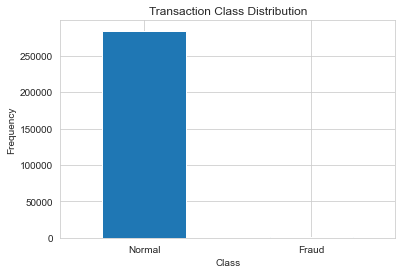

In [6]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks( range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

Clearly the data is highly skewed/unbalanced

In [7]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
fraud = data[ data["Class"] == 1]
normal = data[data['Class']==0]

pd.concat([fraud["Amount"].describe(), normal["Amount"].describe()], axis = 1)


,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [9]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


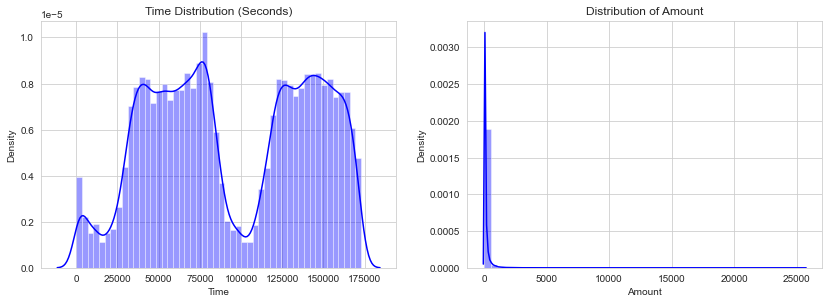

In [10]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue');

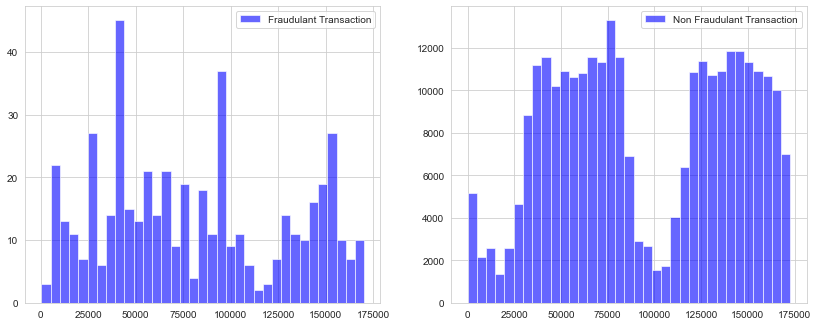

In [11]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data["Class"] == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data["Class"] == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation. Now let us take a sample of the dataset for out modelling and prediction

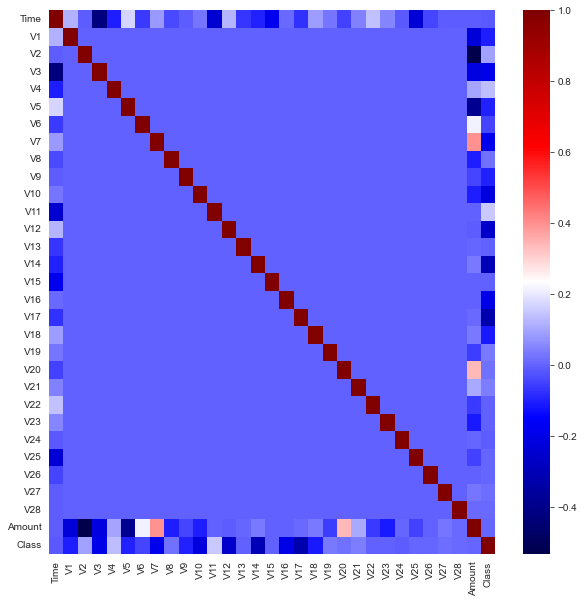

In [12]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

In [13]:
data.corr().round(decimals=3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,0.117,-0.011,-0.420,-0.105,0.173,-0.063,0.085,-0.037,-0.009,...,0.045,0.144,0.051,-0.016,-0.233,-0.041,-0.005,-0.009,-0.011,-0.012
V1,0.117,1.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.228,-0.101
V2,-0.011,0.000,1.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,...,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.531,0.091
V3,-0.420,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000,-0.000,0.000,...,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.211,-0.193
V4,-0.105,-0.000,-0.000,0.000,1.000,-0.000,-0.000,-0.000,0.000,0.000,...,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.099,0.133
V5,0.173,0.000,0.000,-0.000,-0.000,1.000,0.000,0.000,0.000,0.000,...,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.386,-0.095
V6,-0.063,-0.000,0.000,0.000,-0.000,0.000,1.000,0.000,-0.000,0.000,...,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.216,-0.044
V7,0.085,-0.000,0.000,0.000,-0.000,0.000,0.000,1.000,0.000,0.000,...,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.397,-0.187
V8,-0.037,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.103,0.020
V9,-0.009,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.044,-0.098


Highest correlations come from:
- Time & V3 (-0.42)
- Amount & V2 (-0.53)
- Amount & V4 (0.4)

While these correlations are high, I don't expect it to run the risk of multicollinearity.

The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

## Data Pre-processing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [16]:
print(f"TRAINING: X_train: {X_train.shape[0]}, y_train: {y_train.shape[0]}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape[0]}, y_validate: {y_validate.shape[0]}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape[0]}, y_test: {y_test.shape[0]}")

TRAINING: X_train: 159491, y_train: 159491
_______________________________________________________
VALIDATION: X_validate: 39873, y_validate: 39873
__________________________________________________
TESTING: X_test: 85443, y_test: 85443


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [18]:
def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"F1 Score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Precision_score: {precision_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Recall_score: {recall_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"F1 Score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Precision_score: {precision_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Recall_score: {recall_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

## Model Building (with skewed data)

### 1. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)


print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)



scores_dict = {
    'Random Forest': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
F1 Score: 97.50%
_______________________________________________
Precision_score: 100.00%
_______________________________________________
Recall_score: 95.12%
_______________________________________________
Classification Report:
                       0          1  accuracy      macro avg   weighted avg
precision       0.999912    1.00000  0.999912       0.999956       0.999912
recall          1.000000    0.95122  0.999912       0.975610       0.999912
f1-score        0.999956    0.97500  0.999912       0.987478       0.999911
support    159204.000000  287.00000  0.999912  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [    14    273]]

Test Result:
F1 Score: 85.71%
_______________________________________________
Precision_score: 93.10%
_______________________________________________
Recall_score: 79.41%
_______________________________________________
Classification Report:
                      0       

### 2. Artificial Neural Networks (ANN)

In [20]:
from tensorflow import keras

In [21]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [22]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5'), keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True) ]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
   )

Epoch 1/300
78/78 [==============================] - 7s 46ms/step - loss: 0.7957 - fn: 107.0000 - fp: 73491.0000 - tn: 85713.0000 - tp: 180.0000 - precision: 0.0024 - recall: 0.6272 - val_loss: 0.6283 - val_fn: 11.0000 - val_fp: 3402.0000 - val_tn: 36402.0000 - val_tp: 58.0000 - val_precision: 0.0168 - val_recall: 0.8406
Epoch 2/300
78/78 [==============================] - 3s 37ms/step - loss: 0.6845 - fn: 53.0000 - fp: 61205.0000 - tn: 97999.0000 - tp: 234.0000 - precision: 0.0038 - recall: 0.8153 - val_loss: 0.5578 - val_fn: 13.0000 - val_fp: 1108.0000 - val_tn: 38696.0000 - val_tp: 56.0000 - val_precision: 0.0481 - val_recall: 0.8116
Epoch 3/300
78/78 [==============================] - 3s 36ms/step - loss: 0.6086 - fn: 44.0000 - fp: 47830.0000 - tn: 111374.0000 - tp: 243.0000 - precision: 0.0051 - recall: 0.8467 - val_loss: 0.5202 - val_fn: 13.0000 - val_fp: 520.0000 - val_tn: 39284.0000 - val_tp: 56.0000 - val_precision: 0.0972 - val_recall: 0.8116
Epoch 4/300
78/78 [==============

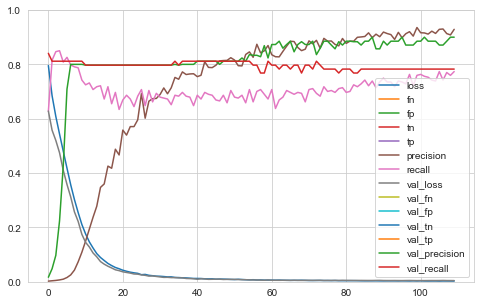

In [23]:
pd.DataFrame(r.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [24]:
model.evaluate(X_test, y_test)

2671/2671 [==============================] - 20s 7ms/step - loss: 0.0029 - fn: 30.0000 - fp: 13.0000 - tn: 85294.0000 - tp: 106.0000 - precision: 0.8908 - recall: 0.7794


[0.0028655852656811476,
 30.0,
 13.0,
 85294.0,
 106.0,
 0.8907563090324402,
 0.779411792755127]

In [25]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict['ANNs'] =  {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    }


2671/2671 [==============================] - 7s 2ms/step
Train Result:
F1 Score: 86.37%
_______________________________________________
Precision_score: 96.15%
_______________________________________________
Recall_score: 78.40%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999611    0.961538  0.999555       0.980575       0.999542
recall          0.999943    0.783972  0.999555       0.891958       0.999555
f1-score        0.999777    0.863724  0.999555       0.931750       0.999532
support    159204.000000  287.000000  0.999555  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159195      9]
 [    62    225]]

Test Result:
F1 Score: 83.14%
_______________________________________________
Precision_score: 89.08%
_______________________________________________
Recall_score: 77.94%
________________________________________

### 3. XGBOOST

In [26]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Train Result:
F1 Score: 100.00%
_______________________________________________
Precision_score: 100.00%
_______________________________________________
Recall_score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
F1 Score: 87.75%
_______________________________________________
Precision_score: 94.87%
_______________________________________________
Recall_score: 81.62%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707 

### 4. CatBoost

In [27]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.089847
0:	learn: 0.3914637	total: 186ms	remaining: 3m 5s
1:	learn: 0.2368418	total: 237ms	remaining: 1m 58s
2:	learn: 0.1341780	total: 283ms	remaining: 1m 33s
3:	learn: 0.0788514	total: 317ms	remaining: 1m 18s
4:	learn: 0.0482949	total: 366ms	remaining: 1m 12s
5:	learn: 0.0315326	total: 410ms	remaining: 1m 7s
6:	learn: 0.0213628	total: 447ms	remaining: 1m 3s
7:	learn: 0.0153604	total: 480ms	remaining: 59.5s
8:	learn: 0.0115137	total: 510ms	remaining: 56.2s
9:	learn: 0.0090128	total: 538ms	remaining: 53.3s
10:	learn: 0.0071550	total: 568ms	remaining: 51.1s
11:	learn: 0.0060638	total: 607ms	remaining: 50s
12:	learn: 0.0052453	total: 652ms	remaining: 49.5s
13:	learn: 0.0046542	total: 689ms	remaining: 48.5s
14:	learn: 0.0042229	total: 733ms	remaining: 48.1s
15:	learn: 0.0038780	total: 764ms	remaining: 47s
16:	learn: 0.0036112	total: 794ms	remaining: 45.9s
17:	learn: 0.0034152	total: 823ms	remaining: 44.9s
18:	learn: 0.0032511	total: 849ms	remaining: 43.8s
19:	learn: 

In [28]:
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
F1 Score: 99.83%
_______________________________________________
Precision_score: 100.00%
_______________________________________________
Recall_score: 99.65%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999994    1.000000  0.999994       0.999997       0.999994
recall          1.000000    0.996516  0.999994       0.998258       0.999994
f1-score        0.999997    0.998255  0.999994       0.999126       0.999994
support    159204.000000  287.000000  0.999994  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]]

Test Result:
F1 Score: 87.06%
_______________________________________________
Precision_score: 93.28%
_______________________________________________
Recall_score: 81.62%
_______________________________________________
Classification Report:
                      0  

### 5. LightGBM

In [29]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}


Train Result:
F1 Score: 33.37%
_______________________________________________
Precision_score: 23.33%
_______________________________________________
Recall_score: 58.54%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999250    0.233333  0.995793       0.616292       0.997872
recall          0.996533    0.585366  0.995793       0.790949       0.995793
f1-score        0.997890    0.333664  0.995793       0.665777       0.996695
support    159204.000000  287.000000  0.995793  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[158652    552]
 [   119    168]]

Test Result:
F1 Score: 25.13%
_______________________________________________
Precision_score: 16.48%
_______________________________________________
Recall_score: 52.94%
_______________________________________________
Classification Report:
                      0   

## Model Comparision

<AxesSubplot:>

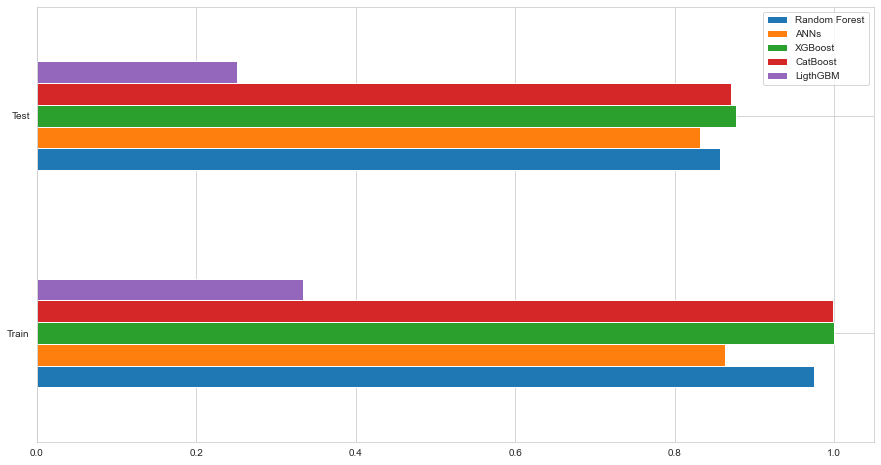

In [34]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

So, XGBoos, CatBoost and Random Forest have a better performance on the test set

The performance of the random forest classifier can be increased by increasing the number of tress/estimators

The performance can also be increased by resampling the dataset to produce a balanced dataset
That will be done the Resampling notebook